In [1]:
import pandas as pd
import yfinance as yf

# Load ETF50 stock IDs
etf50_df = pd.read_csv("ETF50.csv")
etf50_id = etf50_df["STOCK_ID"].astype(str)

frames = []
start_date = "2020-01-01"
end_date = "2024-08-28"

for stock_id in etf50_id:
    # Download historical data using yfinance
    ticker = f"{stock_id}.TW"
    df = yf.download(ticker, start=start_date, end=end_date)

    if not df.empty:
        # Filter the data for months January to August
        df = df[df.index.month <= 8]
        
        # Calculate Trading_money
        df['Trading_money'] = df['Close'] * df['Volume']
        # Add the stock ID to the dataframe
        df['STOCK_ID'] = stock_id
        frames.append(df)

# Concatenate all dataframes
result_df = pd.concat(frames).reset_index()

# Save to CSV
result_df.to_csv("2020-01-01-etf50-tech.csv", index=False, header=True)
print(result_df.head())

# Subsequent analysis
df = pd.read_csv("2020-01-01-etf50-tech.csv", dtype={"STOCK_ID": str})

# Ensure all the columns you want to drop actually exist in the DataFrame
existing_columns = df.columns
columns_to_drop = [
    "Date", "STOCK_ID", "Trading_Volume", "Trading_money", "Open", 
    "Max", "Min", "Close", "Spread", "Trading_turnover", "yesterday_close"
]
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

MA_columns = df.drop(columns_to_drop, axis=1).columns
MA_df = df[MA_columns]

normalized_df = (MA_df - MA_df.mean()) / MA_df.std()
print(normalized_df.head())

[*********************100%%**********************]  1 of 1 completed
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4668/3300228089.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trading_money'] = df['Close'] * df['Volume']
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_4668/3300228089.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STOCK_ID'] = stock_id
[*********************100%%**********************]  1 of 1 completed
/var/folders/_z/wf028lv51rl4_zw8pxj4k374000

        Date   Open   High    Low  Close   Adj Close    Volume  Trading_money  \
0 2020-01-02  332.5  339.0  332.5  339.0  307.796692  31754120   1.076465e+10   
1 2020-01-03  344.0  345.0  335.5  339.5  308.250610  41811268   1.419493e+10   
2 2020-01-06  333.0  334.5  332.0  332.0  301.440948  45343057   1.505389e+10   
3 2020-01-07  332.5  333.0  326.5  329.5  299.171112  50879181   1.676469e+10   
4 2020-01-08  325.0  333.0  325.0  329.5  299.171112  37567748   1.237857e+10   

  STOCK_ID  
0     2330  
1     2330  
2     2330  
3     2330  
4     2330  
       High       Low  Adj Close    Volume
0  0.125851  0.133532   0.129462  0.390786
1  0.137386  0.139496   0.130421  0.691874
2  0.117200  0.132538   0.116029  0.797608
3  0.114316  0.121604   0.111231  0.963347
4  0.114316  0.118622   0.111231  0.564832


<Axes: >

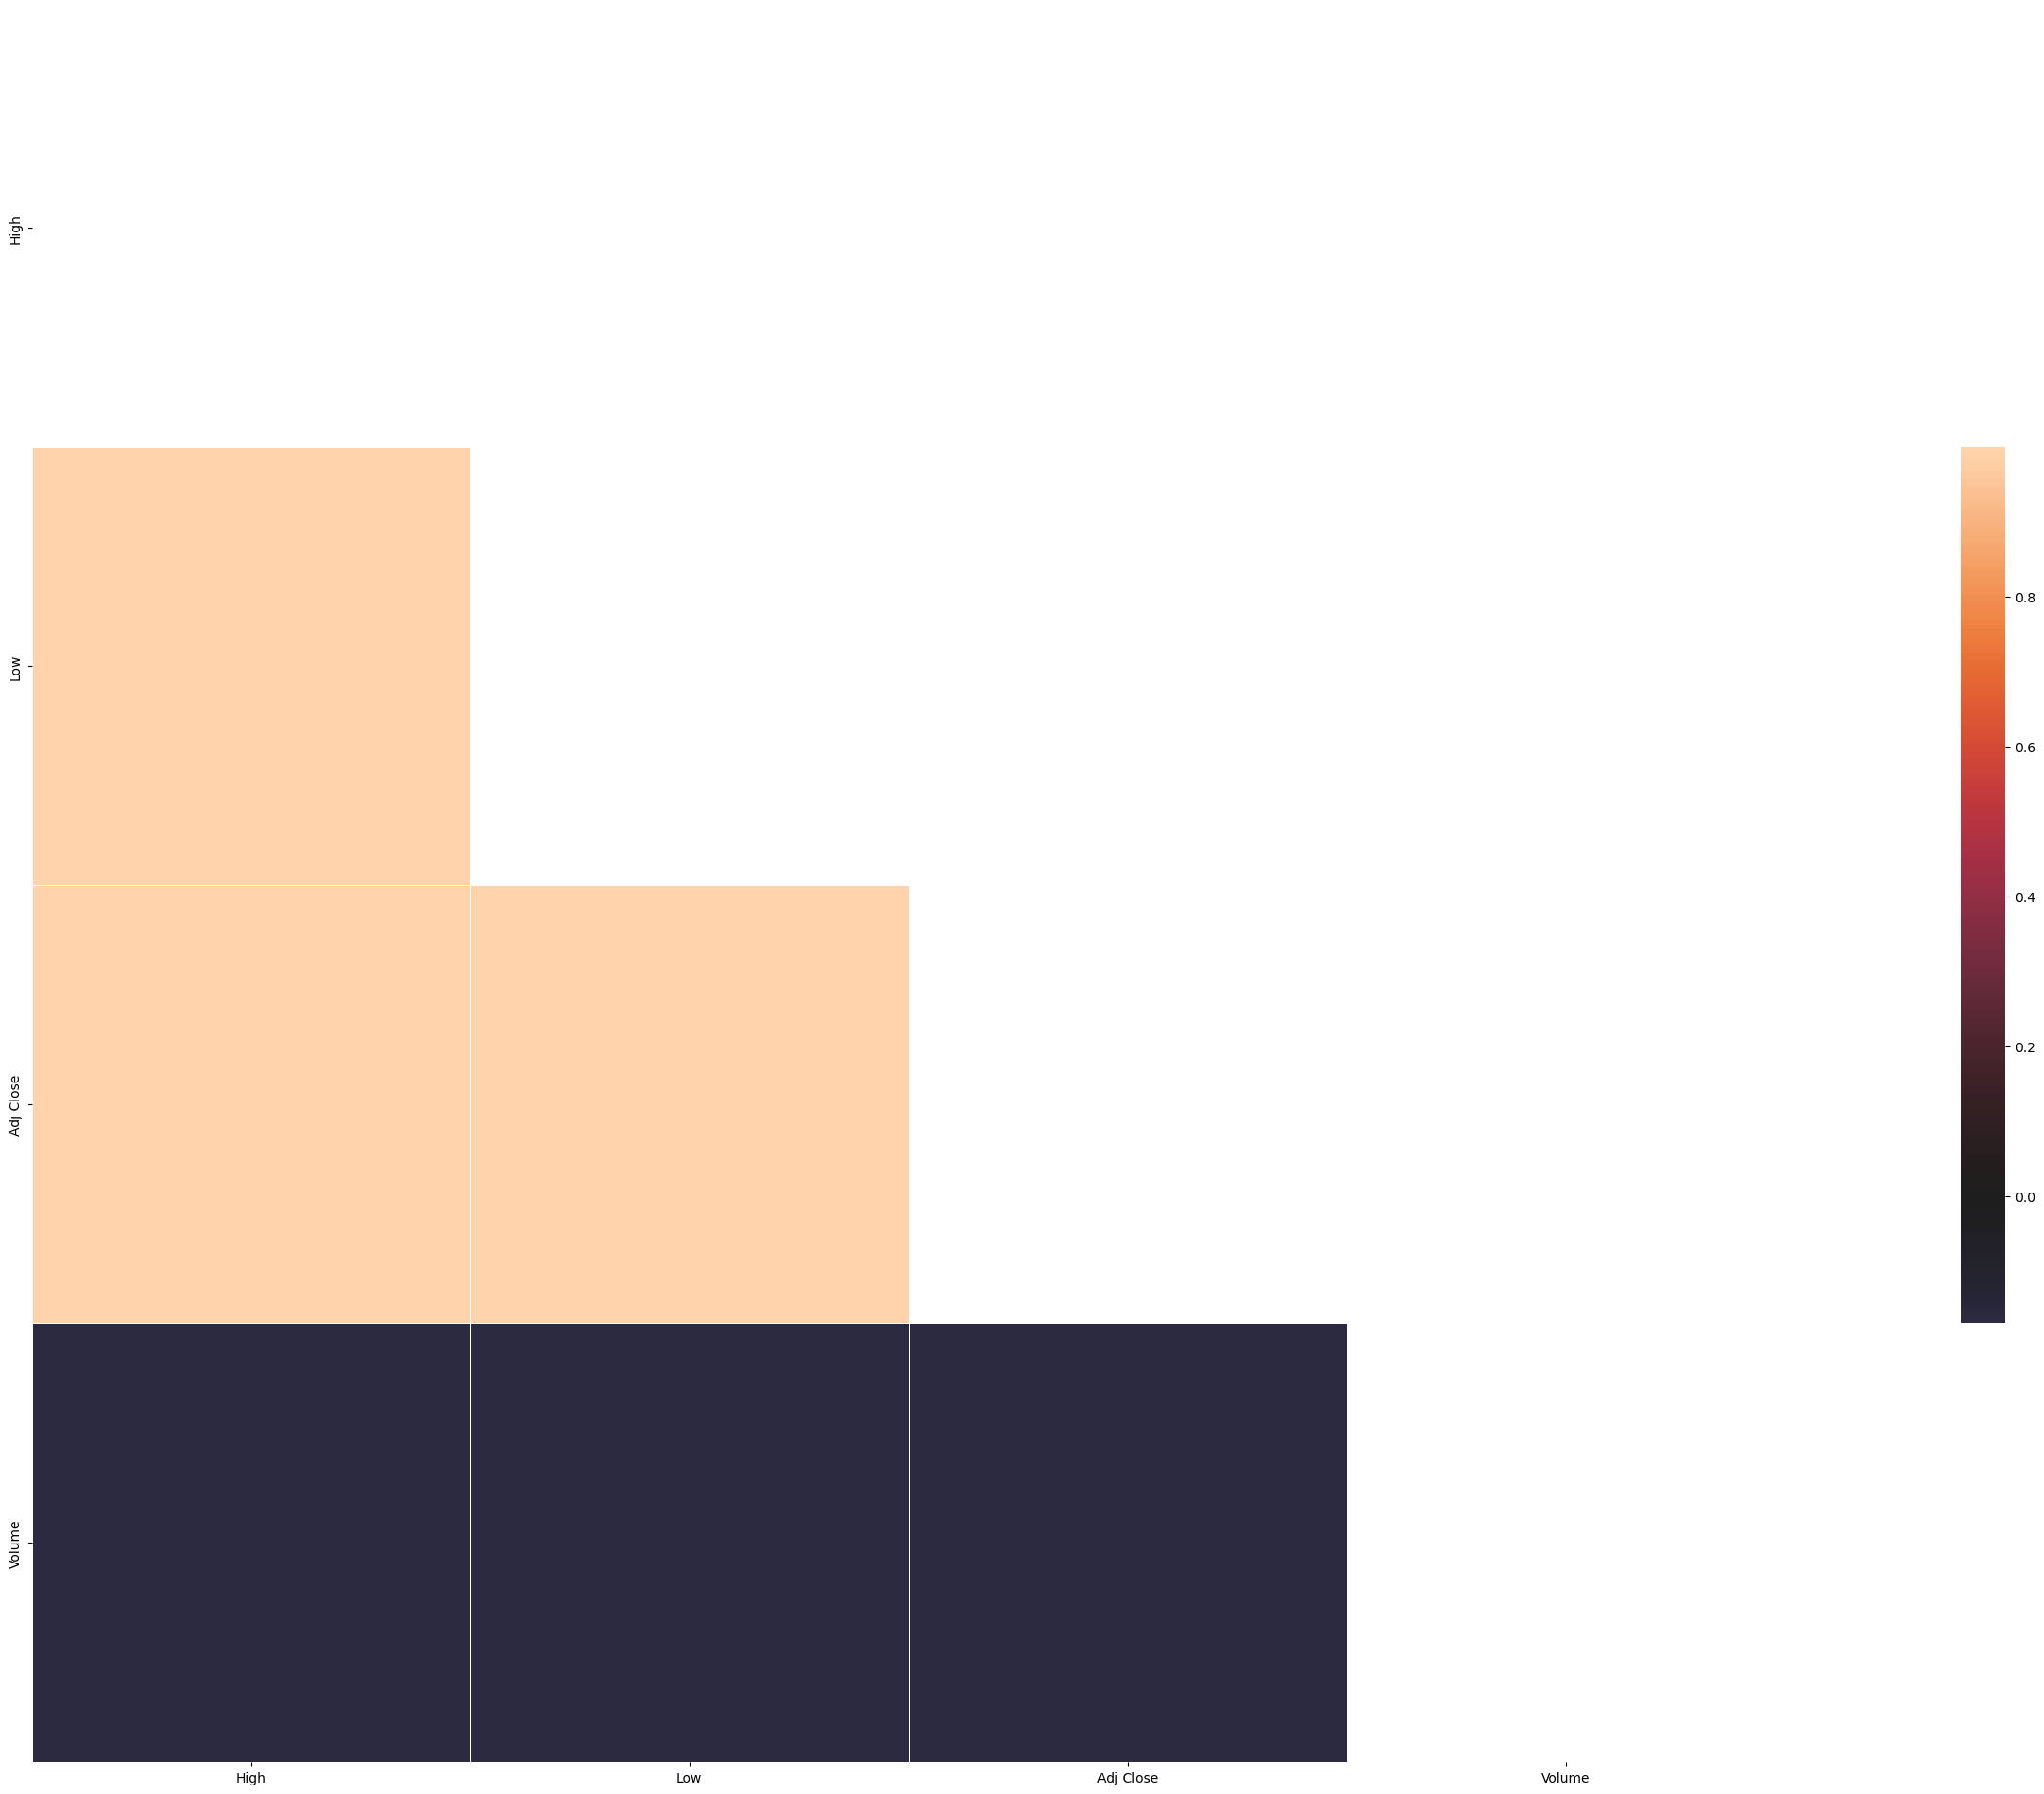

In [5]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = normalized_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(48, 24))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
